In [1]:
import pandas as pd

peakinf = []

In [ ]:
df = pd.read_csv('/Users/spenc/OneDrive/Documents/University_of_Utah/2019-2020/DataScience/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

In [2]:
df = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANCDRdata.csv')

In [3]:
df = pd.read_csv('/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANCDRdata.csv')

FileNotFoundError: [Errno 2] File b'/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANCDRdata/csv' does not exist: b'/Users/markomiholjcic/Documents/GitHub/COMP5360Project/project_files/csv_files/CLEANCDRdata/csv'

In [ ]:
from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

dfDate = pd.DataFrame(df1)
dfDate

In [ ]:
China = df[df["Country/Region"] == "China"]  
China
dChina = China.groupby("Last Update")
dChina = dChina.sum()
dChina
dChina = list(dChina["Confirmed"].values)
dChina.sort()
dChina

ChinaCases = pd.DataFrame({"China": dChina})

ChinaCases
ChinaCases = pd.concat([dfDate,ChinaCases], axis=1, sort = False)
ChinaCases
ChinaCases = ChinaCases.rename(columns={0: "Date"})
ChinaCases

In [ ]:
FMT = '%m/%d/%y'
days = ChinaCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday
#ChinaCases['Date'] = days.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT)).days  )

In [6]:
import numpy as np
def LogisticModel(x,v,t,c):
    return c/(1+np.exp(-(x-t)/v))

In [ ]:
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import math
Day = numday
Cases = list(ChinaCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("China Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [8]:
import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

Day of Inflection: 2020-02-09 00:00:00


In [9]:
sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

End of the Infection: 2020-03-28 00:00:00


In [ ]:
df = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEANCDRdata.csv')

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))


SK = df[df["Country/Region"] == "South Korea"]  
SK
dSK = list(SK["Confirmed"].values)
dSK.sort()
length = len(dSK)

dfDate = pd.DataFrame(df1[0:length])
dfDate

SKCases = pd.DataFrame({"South Korea": dSK})

SKCases
SKCases = pd.concat([dfDate,SKCases], axis=1, sort = False)
SKCases
SKCases = SKCases.rename(columns={0: "Date"})
SKCases

FMT = '%m/%d/%y'
days = SKCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

3.4701968393671003
36.422175095701
8879.324147064912
Day of Inflection: 2020-03-05 00:00:00
End of the Infection: 2020-04-01 00:00:00


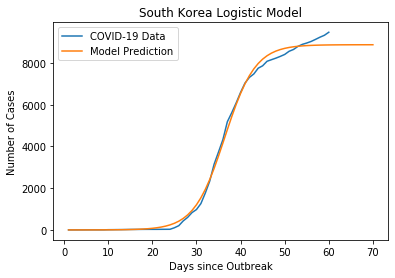

In [11]:
Day = numday
Cases = list(SKCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")

plt.title("South Korea Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [12]:
import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol
startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

Day of Inflection: 2020-02-27 00:00:00
End of the Infection: 2020-04-01 00:00:00


In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

USA = df[df["Country/Region"] == "US"]  
USA
dUS = USA.groupby("Last Update")
dUS = dUS.sum()
dUS

dUS = list(dUS["Confirmed"].values)
dUS.sort()
dUS

length = len(dUS)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

USCases = pd.DataFrame({"US": dUS})
USCases
USCases = pd.concat([dfDate,USCases], axis=1, sort = False)
USCases
USCases = USCases.rename(columns={0: "Date"})
USCases

FMT = '%m/%d/%y'
days = USCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

3.170850301555759
50.893133722405295
237325.15653904516
Day of Inflection: 2020-03-28 00:00:00
End of the Infection: 2020-04-26 00:00:00


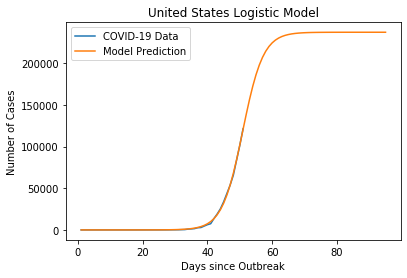

In [14]:
Day = numday
Cases = list(USCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("United States Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

ITA = df[df["Country/Region"] == "Italy"]  
dItaly = ITA.groupby("Last Update")
dItaly = dItaly.sum()
dItaly

dItaly = list(dItaly["Confirmed"].values)
dItaly.sort()
dItaly

length = len(dItaly)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

ITACases = pd.DataFrame({"Italy": dItaly})
ITACases
ITACases = pd.concat([dfDate,ITACases], axis=1, sort = False)
ITACases
ITACases = ITACases.rename(columns={0: "Date"})
ITACases

FMT = '%m/%d/%y'
days = ITACases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

4.0911709469402044
28.97263075890921
105430.77812393679
Day of Inflection: 2020-03-21 00:00:00
End of the Infection: 2020-04-07 00:00:00


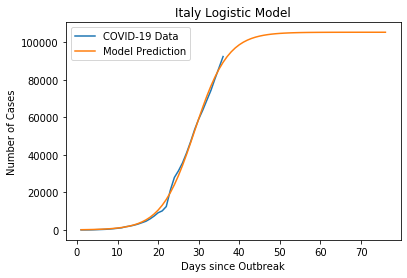

In [16]:
Day = numday
Cases = list(ITACases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

startdate = "01/21/2020"
enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Italy Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

4.381458357617961
40.24372556306867
62575.79999852355
Day of Inflection: 2020-04-02 00:00:00
End of the Infection: 2020-05-20 00:00:00


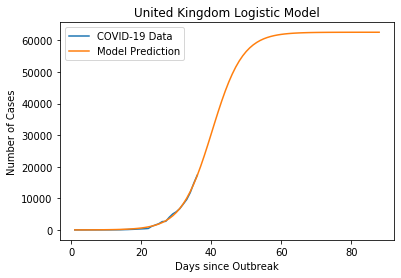

In [17]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

UK = df[df["Country/Region"] == "United Kingdom"]  
dUK = UK.groupby("Last Update")
dUK = dUK.sum()
dUK

dUK = list(dUK["Confirmed"].values)
dUK.sort()
dUK

length = len(dUK)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

UKCases = pd.DataFrame({"United Kingdom": dUK})
UKCases
UKCases = pd.concat([dfDate,UKCases], axis=1, sort = False)
UKCases
UKCases = UKCases.rename(columns={0: "Date"})
UKCases

FMT = '%m/%d/%y'
days = UKCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(UKCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol


enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("United Kingdom Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

2.701371731208712
18.68120432424304
1037.8199149074474
Day of Inflection: 2020-03-29 00:00:00
End of the Infection: 2020-04-16 00:00:00


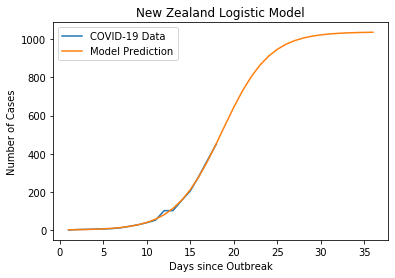

In [18]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

NZ = df[df["Country/Region"] == "New Zealand"]  
dNZ = NZ.groupby("Last Update")
dNZ = dNZ.sum()
dNZ

dNZ = list(dNZ["Confirmed"].values)
dNZ.sort()
dNZ

length = len(dNZ)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

NZCases = pd.DataFrame({"New Zealand": dNZ})
NZCases
NZCases = pd.concat([dfDate,NZCases], axis=1, sort = False)
NZCases
NZCases = NZCases.rename(columns={0: "Date"})
NZCases

FMT = '%m/%d/%y'
days = NZCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(NZCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol


enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("New Zealand Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

6.164848465896461
29.730145659273266
42447.32141224196
Day of Inflection: 2020-03-21 00:00:00
End of the Infection: 2020-06-01 00:00:00


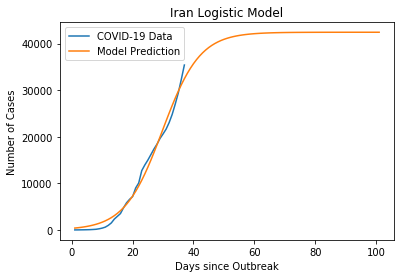

In [19]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

IR = df[df["Country/Region"] == "Iran"]  
dIR = IR.groupby("Last Update")
dIR = dIR.sum()
dIR

dIR = list(dIR["Confirmed"].values)
dIR.sort()
dIR

length = len(dIR)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

IRCases = pd.DataFrame({"Iran": dIR})
IRCases
IRCases = pd.concat([dfDate,IRCases], axis=1, sort = False)
IRCases
IRCases = IRCases.rename(columns={0: "Date"})
IRCases

FMT = '%m/%d/%y'
days = IRCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(IRCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Iran Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [ ]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

AU = df[df["Country/Region"] == "Australia"]  
dAU = AU.groupby("Last Update")
dAU = dAU.sum()
dAU

dAU = list(dAU["Confirmed"].values)
dAU.sort()
dAU

length = len(dAU)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

AUCases = pd.DataFrame({"Australia": dAU})
AUCases
AUCases = pd.concat([dfDate,AUCases], axis=1, sort = False)
AUCases
AUCases = AUCases.rename(columns={0: "Date"})
AUCases

3.5678210796438092
44.29959105949179
5842.179113546007
Day of Inflection: 2020-03-27 00:00:00
End of the Infection: 2020-05-02 00:00:00


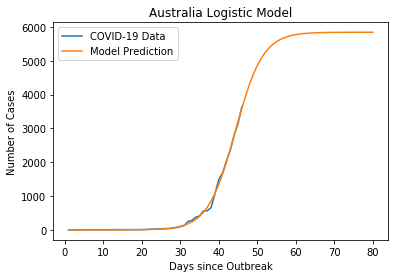

In [21]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

AU = df[df["Country/Region"] == "Australia"]  
dAU = AU.groupby("Last Update")
dAU = dAU.sum()
dAU

dAU = list(dAU["Confirmed"].values)
dAU.sort()
dAU

length = len(dAU)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

AUCases = pd.DataFrame({"Australia": dAU})
AUCases
AUCases = pd.concat([dfDate,AUCases], axis=1, sort = False)
AUCases
AUCases = AUCases.rename(columns={0: "Date"})
AUCases

FMT = '%m/%d/%y'
days = AUCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(AUCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Australia Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

4.788094775308883
33.48324806845805
2666.947628169576
Day of Inflection: 2020-03-31 00:00:00
End of the Infection: 2020-05-07 00:00:00


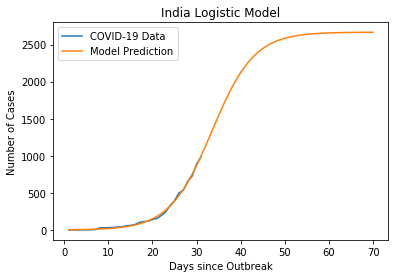

In [22]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

IN = df[df["Country/Region"] == "India"]  
dIN = IN.groupby("Last Update")
dIN = dIN.sum()
dIN

dIN = list(dIN["Confirmed"].values)
dIN.sort()
dIN
length = len(dIN)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

INCases = pd.DataFrame({"India": dIN})
INCases
INCases = pd.concat([dfDate,INCases], axis=1, sort = False)
INCases
INCases = INCases.rename(columns={0: "Date"})
INCases

FMT = '%m/%d/%y'
days = INCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(INCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("India Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

3.3817418463793945
15.070072439587031
811.7011665021364
Day of Inflection: 2020-03-24 00:00:00
End of the Infection: 2020-04-15 00:00:00


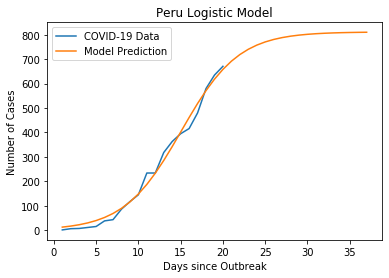

In [23]:

from datetime import datetime
Dates = df.groupby("Last Update")
df1 = Dates.count()

df1 = list(df1.index.values)
df1.sort(key = lambda date: datetime.strptime(date, '%m/%d/%y'))

PR = df[df["Country/Region"] == "Peru"]  
dPR = PR.groupby("Last Update")
dPR = dPR.sum()
dPR

dPR = list(dPR["Confirmed"].values)
dPR.sort()
dPR
length = len(dPR)
length

dfDate = pd.DataFrame(df1[0:length])
dfDate

PRCases = pd.DataFrame({"Peru": dPR})
PRCases
PRCases = pd.concat([dfDate,PRCases], axis=1, sort = False)
PRCases
PRCases = PRCases.rename(columns={0: "Date"})
PRCases

FMT = '%m/%d/%y'
days = PRCases['Date']
numday = []
from datetime import datetime 
for a in days:
    x = a
    y = (datetime.strptime(x, FMT) - datetime.strptime("1/21/20", FMT))
    z = y.days
    numday.append(z)
numday

Day = numday
Cases = list(PRCases.iloc[:,1])

plt.plot(Day, Cases, label="COVID-19 Data")

fit = curve_fit(LogisticModel,Day,Cases,p0=[2,30,75000])
params = fit[0]
v = params[0]
t = params[1]
c = params[2]

print(v)
print(t)
print(c)

peakinf.append(math.ceil(c))

import math
finishday = t
finishday = math.ceil(finishday)
startdate = "01/21/2020"
startdate = pd.to_datetime(startdate) + pd.DateOffset(days=(67-len(numday)))
startdate

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=finishday)
print("Day of Inflection: " + str(enddate))

sol = int(fsolve(lambda Day : LogisticModel(Day,v,t,c) - int(c),t))
sol

enddate = pd.to_datetime(startdate) + pd.DateOffset(days=sol)
print("End of the Infection: " + str(enddate))

pred_x = list(range(max(Day),sol))
pred_x

Pred = [LogisticModel(i,v,t,c) for i in Day+pred_x]

plt.plot(Day+pred_x, Pred, label="Model Prediction")
plt.title("Peru Logistic Model")
plt.xlabel("Days since Outbreak"); plt.ylabel("Number of Cases")
plt.legend()

In [87]:
peakinf

[77708, 8880, 237326, 105431, 62576, 1038, 42448, 5843, 2667, 812]

In [ ]:
data = pd.DataFrame({"PeakInfections": peakinf})
country = ["China", "South Korea", "United States", "Italy", "United Kingdom", "New Zealand", "Iran", "Australia", "India", "Peru"]
cont = pd.DataFrame({"Country": country})
data = pd.concat([cont,data], axis=1, sort = False)
data=data.sort_values(['Country'])
data=data.reset_index(drop=True)
data

In [117]:
df3 = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\CLEAN_WorldHealthIndex.csv')
df4 = pd.read_csv(r'C:\Users\austi\Documents\GitHub\COMP5360Project\project_files\csv_files\population_and_density_by_country.csv')

In [118]:

countries = ['UnitedStatesofAmerica','Italy', 'China','UnitedKingdom','Iran,IslamicRepublicof',  'RepublicofKorea',   'Australia' , 'India','NewZealand', 'Peru']
countries2 = ['United States','Italy', 'China','United Kingdom','Iran',  'South Korea',   'Australia' , 'India','New Zealand', 'Peru']
df3 = df3.loc[df3['Member State'].isin(countries)]
df4 = df4.loc[df4['name'].isin(countries2)]
df3 = df3.sort_values(by=['Member State'])
df4 = df4.sort_values(by=['name'])
indexes = list(df3['Index'].values)
pop_density= list(df4["Density"].values)
population=list(df4['pop2019'].values)
index = pd.DataFrame({"WHOIndex": indexes})
pop_density = pd.DataFrame({"PopulationDensity": pop_density,'population':population})
data = pd.concat([data,index], axis=1, sort = False)
data = pd.concat([data,pop_density], axis=1, sort = False)
data

,Country,PeakInfections,WHOIndex,PopulationDensity,population
0,Australia,5843,0.876,3.2765,25203.198
1,China,77708,0.485,147.7068,1433783.686
2,India,2667,0.617,415.6290,1366417.754
3,Iran,42448,0.659,50.3059,82913.906
4,Italy,105431,0.991,200.9387,60550.075
5,New Zealand,1038,0.827,17.6845,4783.063
6,Peru,812,0.547,25.2957,32510.453
7,South Korea,8880,0.759,511.1796,51225.308
8,United Kingdom,62576,0.925,278.0164,67530.172
9,United States,237326,0.838,35.1092,329064.917


([<matplotlib.axis.YTick at 0x282df429cc8>,
 <a list of 4 Text yticklabel objects>)

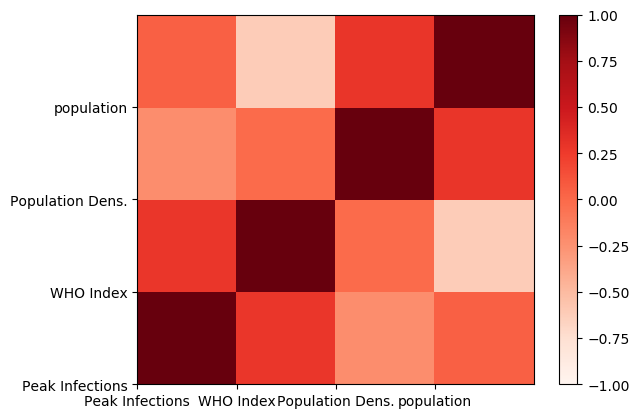

In [119]:
correlation= data.corr()
plt.style.use('default')
Global_heatmap=plt.pcolor(correlation,vmin=-1,vmax=1,cmap=plt.cm.Reds)
plt.colorbar(Global_heatmap)
plt.xticks((range(4)),['Peak Infections','WHO Index', 'Population Dens.','population'])
plt.yticks((range(4)),['Peak Infections','WHO Index', 'Population Dens.','population'])           

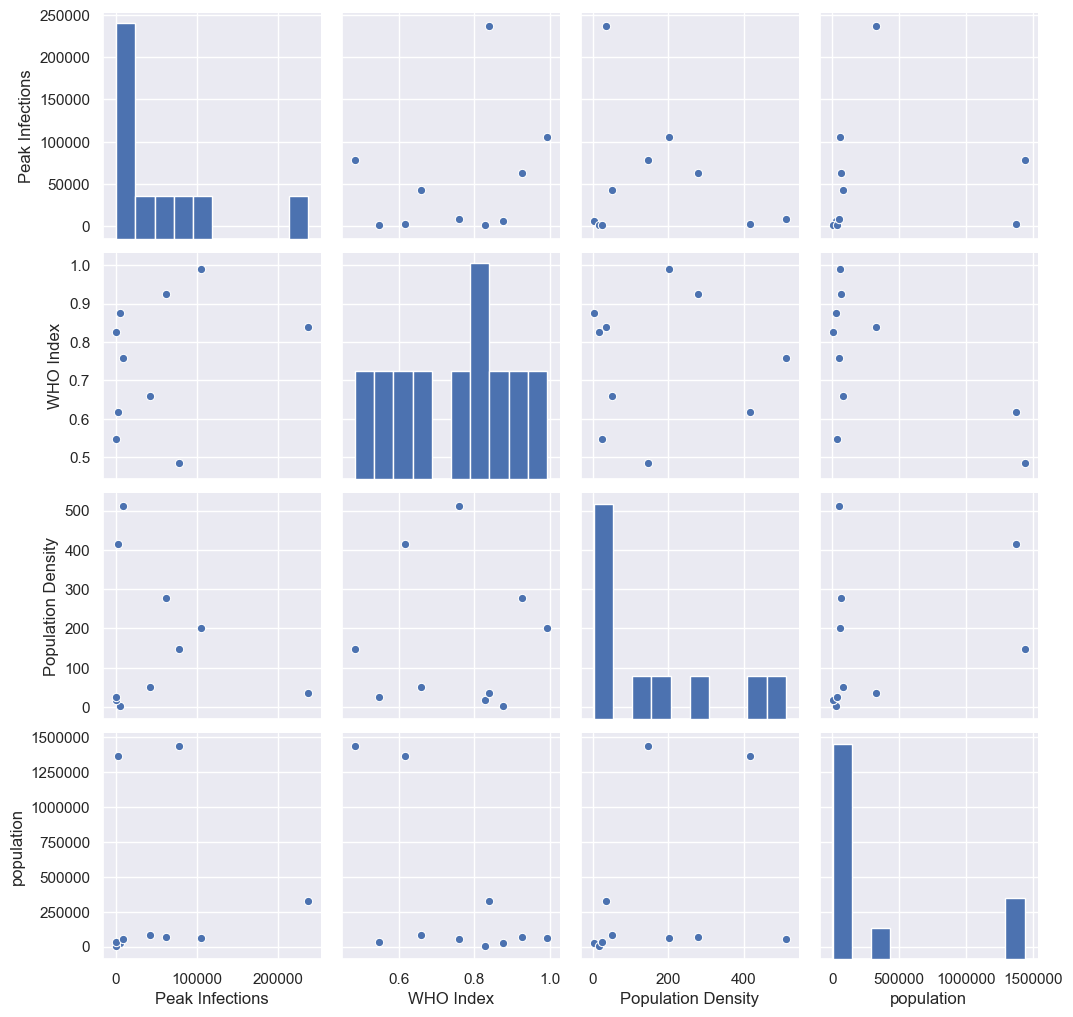

In [104]:
import seaborn as sns
sns.set()
sns.pairplot(data)#, hue="Language");

In [126]:
import statsmodels.formula.api as sm
peak_infections_linear_regression = sm.ols(formula="PeakInfections~ WHOIndex+population", data=data).fit()
peak_infections_linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         PeakInfections   R-squared:                       0.162
Model:                            OLS   Adj. R-squared:                 -0.077
Method:                 Least Squares   F-statistic:                    0.6766
Date:                Sun, 29 Mar 2020   Prob (F-statistic):              0.539
Time:                        21:00:45   Log-Likelihood:                -124.93
No. Observations:                  10   AIC:                             255.9
Df Residuals:                       7   BIC:                             256.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.296e+05    1.6e+05     -0.809      0.445   -5.09e+05    2.49e+05
WHOIndex    2.228e+05   1.93e+05      1.153      0.287   -2.34e+05    6.79e+05
population     0.0478      0.058      0.828      0.435      -0.089       0.184
==============================================================================
Omnibus:                        9.832   Durbin-Watson:                   1.682
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                4.178
Skew:                           1.389   Prob(JB):                        0.124
Kurtosis:                       4.522   Cond. No.                     6.53e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
#import numpy as np
#def GompertzModel(x,a,b,c):
#    return a*(np.exp(b*(np.exp(c*x))))
#
#from scipy.optimize import curve_fit
#from scipy.optimize import fsolve
#import matplotlib.pyplot as plt
#
#Day = numday
#Cases = list(ChinaCases.iloc[:,1])
#fit2 = curve_fit(GompertzModel,Day,Cases, p0=[77000, -20, 2],)
#
#params = fit2[0]
#
#a = params[0]
#b = params[1]
#c = params[2]
#
#print(a)
#print(b)
#print(c)
##Pred = LogisticModel(Day, *params)
##plt.plot(Day, Pred)
##plt.plot(Day, Cases)